# WORKSHEET 1

Leeja Sagar Shrestha (L6CG7)

Getting Started with Image Processing with Python.

Introduction to Python Imaging Library(PIL)

## Exercise - 1:

1. Read and display the image.
• Read the image using the Pillow library and display it.
• You can also use matplotlib to display the image.

In [3]:
from PIL import Image

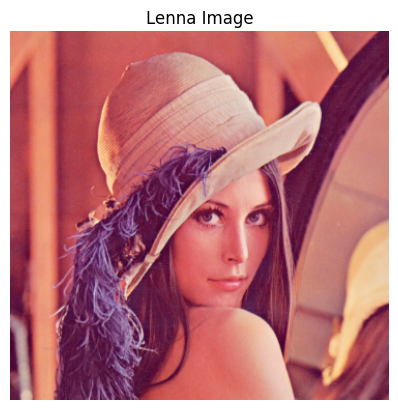

In [2]:
from PIL import Image
import matplotlib.pyplot as plt
image_path = "/content/drive/MyDrive/AIsem6/lenna_image.png"
image_colored = Image.open(image_path)
image_colored.show()
plt.imshow(image_colored)
plt.axis("off")
plt.title("Lenna Image")
plt.show()


2. Display only the top left corner of 100x100 pixels.
• Extract the top-left corner of the image (100x100 pixels) and display it using NumPy and
Array Indexing.

In [4]:
import numpy as np

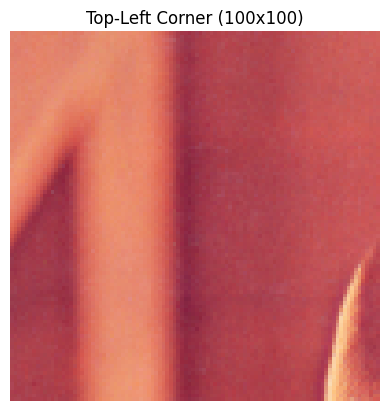

In [5]:
image_array = np.array(image_colored)
top_left_corner = image_array[:100, :100]
plt.imshow(top_left_corner)
plt.axis("off")
plt.title("Top-Left Corner (100x100)")
plt.show()

3. Show the three color channels (R, G, B).
• Separate the image into its three color channels (Red, Green, and Blue) and display them
individually, labeling each channel as R, G, and B.{Using NumPy.}

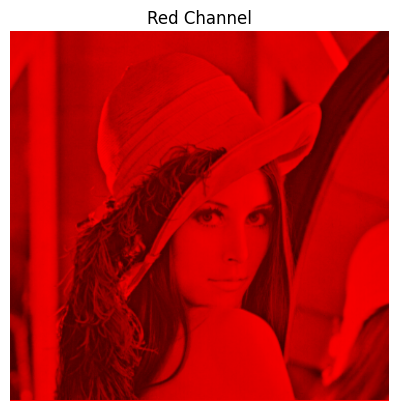

In [7]:
red_channel = image_array.copy()
red_channel[:, :, 1] = 0
red_channel[:, :, 2] = 0
plt.imshow(red_channel)
plt.title("Red Channel")
plt.axis("off")
plt.show()

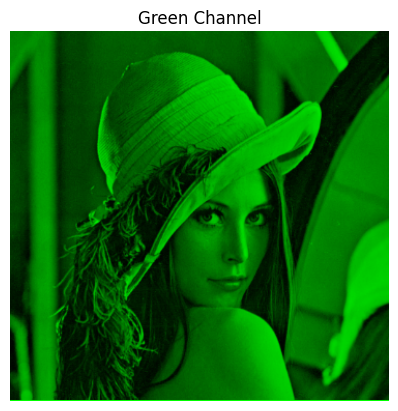

In [8]:
green_channel = image_array.copy()
green_channel[:, :, 0] = 0
green_channel[:, :, 2] = 0
plt.imshow(green_channel)
plt.title("Green Channel")
plt.axis("off")
plt.show()

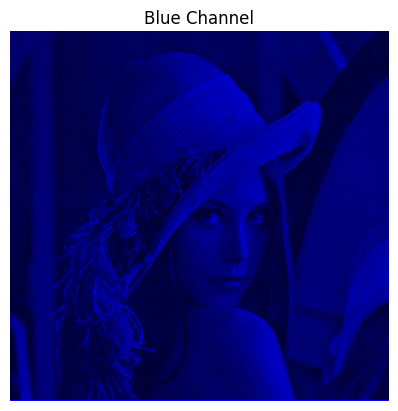

In [9]:
blue_channel = image_array.copy()
blue_channel[:, :, 0] = 0
blue_channel[:, :, 1] = 0
plt.imshow(blue_channel)
plt.title("Blue Channel")
plt.axis("off")
plt.show()

Modify the top 100 × 100 pixels to a value of 210 and display the resulting image:
• Modify the pixel values of the top-left 100 × 100 region to have a value of 210 (which is a
light gray color), and then display the modified image.

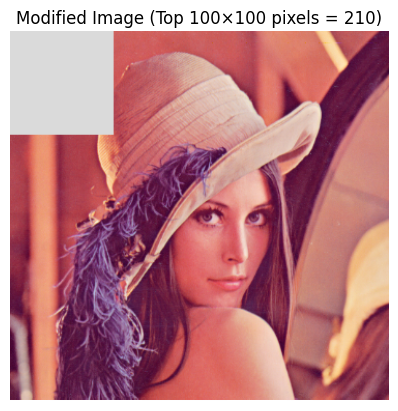

In [10]:
image_array[:100, :100] = 210
modified_image = Image.fromarray(image_array)
plt.imshow(modified_image)
plt.title("Modified Image (Top 100×100 pixels = 210)")
plt.axis("off")
plt.show()


## Exercise: 2

1. Load and display a grayscale image.
• Load a grayscale image using the Pillow library.
• Display the grayscale image using matplotlib.

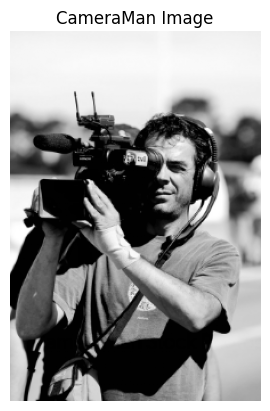

In [26]:
from PIL import Image
import matplotlib.pyplot as plt
image_path = "/content/drive/MyDrive/AIsem6/camera_man.jpg"
image_grayed = Image.open(image_path).convert('L')
plt.imshow(image_grayed, cmap='gray')
plt.axis("off")
plt.title("CameraMan Image")
plt.show()


2. Extract and display the middle section of the image (150 pixels).
• Extract a 150 pixel section from the center of the image using NumPy array slicing.
• Display this cropped image using matplotlib.

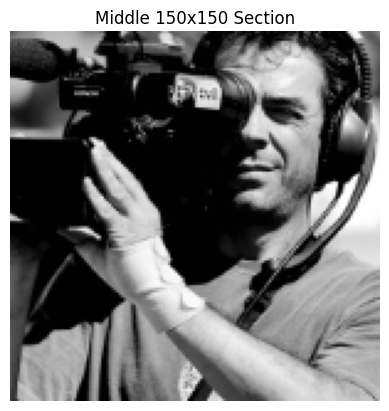

In [27]:
image_array = np.array(image_grayed)
height, width = image_array.shape
start_x = (width // 2) - 75
start_y = (height // 2) - 75
end_x = start_x + 150
end_y = start_y + 150
middle_section = image_array[start_y:end_y, start_x:end_x]
plt.imshow(middle_section, cmap='gray')
plt.axis("off")
plt.title("Middle 150x150 Section")
plt.show()

3. Apply a simple threshold to the image (e.g., set all pixel values below 100 to 0).
• Apply a threshold to the grayscale image: set all pixel values below 100 to 0, and all values
above 100 to 255 (creating a binary image).
• Display the resulting binary image.

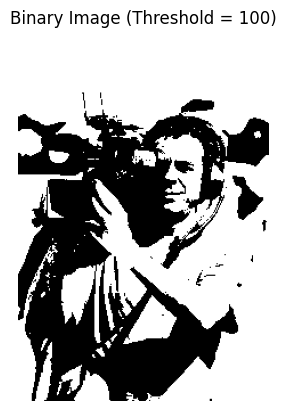

In [28]:
threshold_value = 100
binary_image = np.where(image_array < threshold_value, 0, 255)
plt.imshow(binary_image, cmap='gray')
plt.axis("off")
plt.title("Binary Image (Threshold = 100)")
plt.show()

4. Rotate the image 90 degrees clockwise and display the result.
• Rotate the image by 90 degrees clockwise using the Pillow rotate method or by manipulating
the image array.
• Display the rotated image using matplotlib.

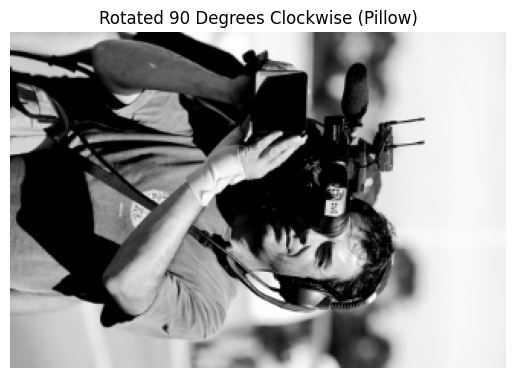

In [29]:
rotated_image = image_grayed.rotate(-90, expand=True)
plt.imshow(rotated_image, cmap='gray')
plt.axis("off")
plt.title("Rotated 90 Degrees Clockwise (Pillow)")
plt.show()

5. Convert the grayscale image to an RGB image.
• Convert the grayscale image into an RGB image where the grayscale values are replicated
across all three channels (R, G, and B).
• Display the converted RGB image using matplotlib.

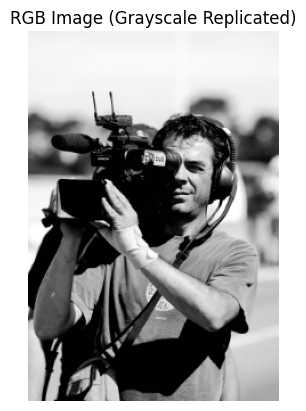

In [30]:
rgb_image = np.stack((image_array,) * 3, axis=-1)
plt.imshow(rgb_image)
plt.axis("off")
plt.title("RGB Image (Grayscale Replicated)")
plt.show()

### 3 Image Compression and Decompression using PCA.

1. Load and Prepare Data:
• Fetch an image of you choice.{If colour convert to grayscale}
• Center the dataset - Standaridze the Data.
• Calculate the covaraince matrix of the Standaridze data.

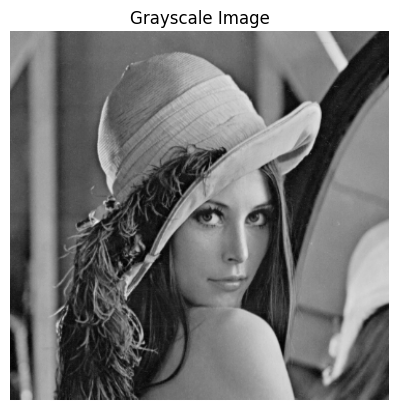

Mean: 123.22885000994934
Standard Deviation: 48.4529695822499
Covariance Matrix Shape: (366, 366)
Covariance Matrix:
 [[ 0.63151995  0.61539384  0.59823939 ... -0.20317985 -0.19751555
  -0.17746954]
 [ 0.61539384  0.60940111  0.59593405 ... -0.23273413 -0.22640124
  -0.20698558]
 [ 0.59823939  0.59593405  0.59271171 ... -0.2476314  -0.24075542
  -0.2222826 ]
 ...
 [-0.20317985 -0.23273413 -0.2476314  ...  1.3075225   1.29483298
   1.28089899]
 [-0.19751555 -0.22640124 -0.24075542 ...  1.29483298  1.29347978
   1.28690391]
 [-0.17746954 -0.20698558 -0.2222826  ...  1.28089899  1.28690391
   1.2924409 ]]


In [45]:
image_path = "/content/drive/MyDrive/AIsem6/lenna_image.png"
image_colored = Image.open(image_path)

image_gray = image_colored.convert('L') if image_colored.mode != 'L' else image_colored

image_array = np.array(image_gray)
height, width = image_array.shape

plt.imshow(image_array, cmap='gray')
plt.axis("off")
plt.title("Grayscale Image")
plt.show()

mean = np.mean(image_array)
std = np.std(image_array)
standardized_data = (image_array - mean) / std

covariance_matrix = np.cov(standardized_data, rowvar=False)

print("Mean:", mean)
print("Standard Deviation:", std)
print("Covariance Matrix Shape:", covariance_matrix.shape)
print("Covariance Matrix:\n", covariance_matrix)


2. Eigen Decomposition and Identifying Principal Components:
• Compute Eigen Values and Eigen Vectors.
• Sort the eigenvalues in descending order and choose the top k eigenvectors corresponding to
the highest eigenvalues.
• Identify the Principal Components with the help of cumulative Sum plot.

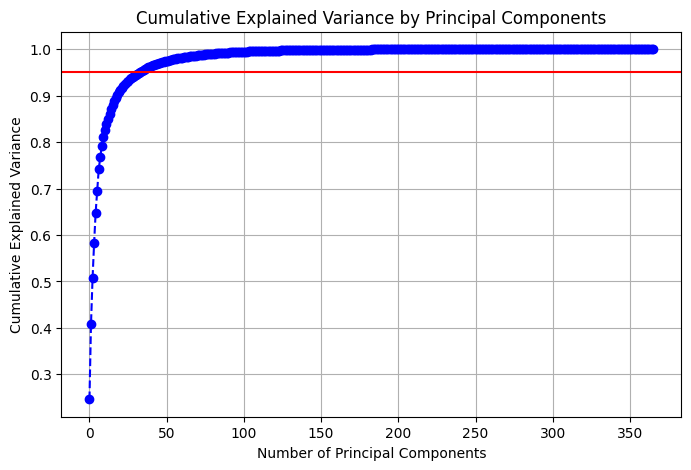


Number of Principal Components to retain (k): 34


In [44]:
eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

explained_variance_ratio = sorted_eigenvalues / np.sum(sorted_eigenvalues)
cumulative_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(8, 5))
plt.plot(cumulative_variance, marker='o', linestyle='--', color='b')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance by Principal Components")
plt.axhline(y=0.95, color='r', linestyle='-')
plt.grid(True)
plt.show()

k = np.argmax(cumulative_variance >= 0.95) + 1
print(f"\nNumber of Principal Components to retain (k): {k}")


3. Reconstruction and Experiment:

• Reconstruction: Transform the original data by multiplying it with the selected eigenvec-
tors(PCs) to obtain a lower-dimensional representation.

• Experiments: Pick Four different combination of principal components with various ex-
plained variance value and compare the result.

• Display the Results and Evaluate.

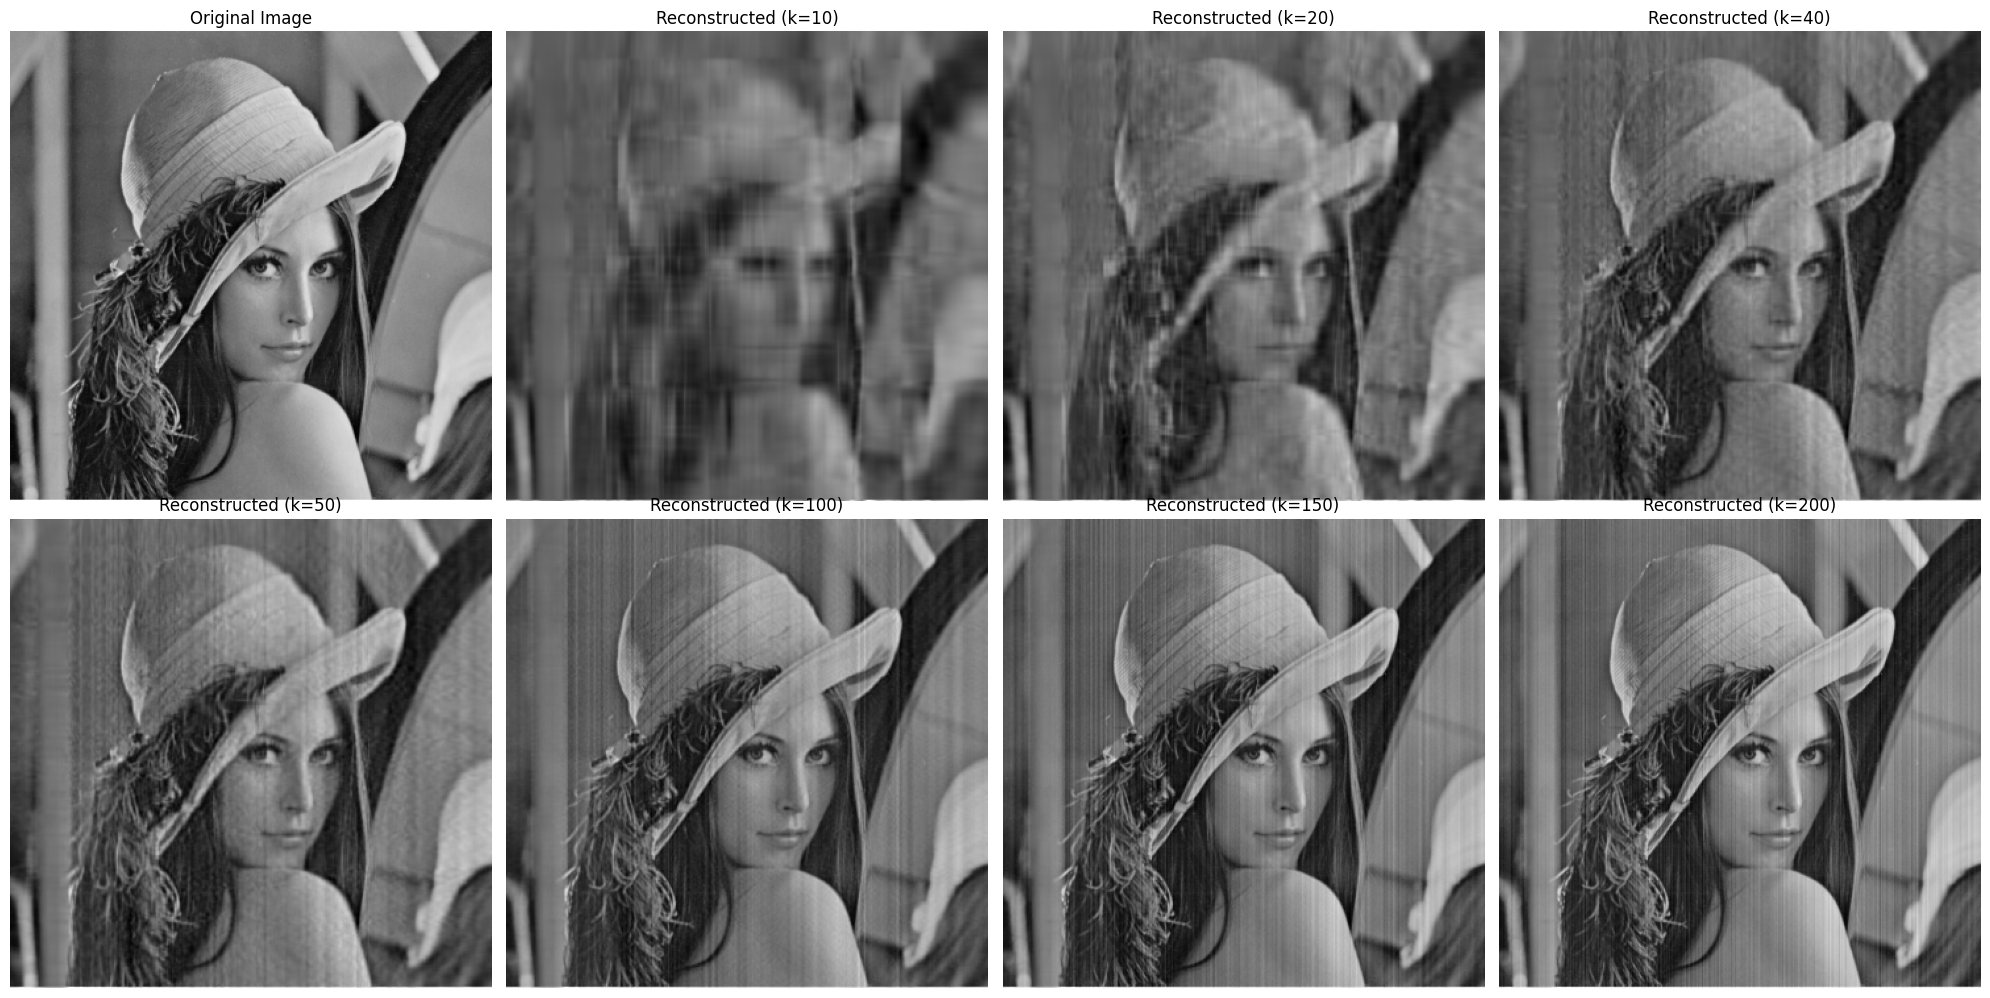

In [43]:
def compress_decompress_image(data, eigenvectors, mean, k):
    components = eigenvectors[:, :k]
    compressed_data = np.dot(data, components)
    decompressed_data = np.dot(compressed_data, components.T) + mean
    return compressed_data, decompressed_data

k_values = [10, 20, 40, 50, 100, 150, 200]
plt.figure(figsize=(20, 10))

plt.subplot(2, 4, 1)
plt.imshow(image_array, cmap='gray')
plt.title("Original Image")
plt.axis("off")

for i, k in enumerate(k_values):
    compressed_data, decompressed_data = compress_decompress_image(
        standardized_data, sorted_eigenvectors, mean, k
    )
    decompressed_image = decompressed_data.reshape(height, width)

    plt.subplot(2, 4, i + 2)
    plt.imshow(decompressed_image, cmap='gray')
    plt.title(f"Reconstructed (k={k})")
    plt.axis("off")

plt.tight_layout()
plt.show()
